In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
center = (10,10)
cx, cy = center
N = 8
R = 50
unit_angle = 2*np.pi/N
print(unit_angle, '= unitangle \n')
pointsx = []
pointsy = []

angle = 0
points = []

for i in range(N):
    dx = R*np.cos(angle)
    dy = R*np.sin(angle)
    point = (dx, dy)
    points.append(point)
    pointsx.append(dx)
    pointsy.append(dy)

    angle = angle + unit_angle
    # print(angle)




0.7853981633974483 = unitangle 



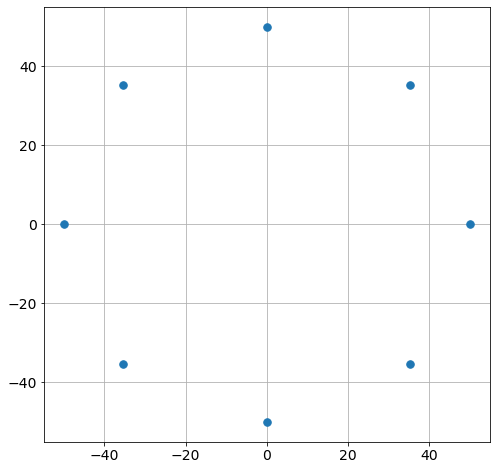

In [27]:
plt.rcParams.update(
    {'font.size': 14, 'lines.markersize': 15, 'lines.linewidth': 0, 'axes.grid': True, 'lines.marker': '.',
     })
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(pointsx, pointsy)

# ax.legend()

In [28]:
projection_matrix = np.matrix([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

v = np.matrix([[1, 0, 0, 0]]).reshape(4,1)

projection_matrix@v
len(projection_matrix)


2

In [29]:
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLACK = (0, 0, 0)

scale = 100
WIDTH, HEIGHT = 1000, 800
screen_center = [WIDTH/2, HEIGHT/2]  # x, y


In [30]:
class Point():
    def __init__(self, x, y, z):
        self.vec = np.matrix([[x], [y], [z], [1]])
        self.x = self.vec[0, 0]
        self.y = self.vec[1, 0]
        self.z = self.vec[2, 0]

    # def __add__(self, other_point):

    def vecprod(self, matrix):
        self.vec = matrix @ self.vec
        self.x = self.vec[0, 0]
        self.y = self.vec[1, 0]
        self.z = self.vec[2, 0]

        return self


class Wheel:
    def __init__(self, radius, height=0, x=0, y=0, z=0, color='black'):

        self.radius = radius
        self.height = height

        self.diag_coef = radius/np.sqrt(2)
        self.color = color

        self.center = Point(x, y, z)
        self.top = Point(x, y, height)

        self.cirle_points = []
        self.cirle_points.append(
            Point(self.center.x, self.center.y + self.radius, self.center.z))
        self.cirle_points.append(Point(self.center.x + self.diag_coef, self.center.y + self.diag_coef,
                                       self.center.z))
        self.cirle_points.append(
            Point(self.center.x + self.radius, self.center.y, self.center.z))
        self.cirle_points.append(Point(self.center.x + self.diag_coef, self.center.y - self.diag_coef,
                                       self.center.z))
        self.cirle_points.append(
            Point(self.center.x, self.center.y - self.radius, self.center.z))
        self.cirle_points.append(Point(self.center.x - self.diag_coef, self.center.y - self.diag_coef,
                                       self.center.z))
        self.cirle_points.append(
            Point(self.center.x - self.radius, self.center.y, self.center.z))
        self.cirle_points.append(Point(self.center.x - self.diag_coef, self.center.y + self.diag_coef,
                                       self.center.z))

        self.points = list(self.cirle_points)
        self.points.append(self.center)
        self.points.append(self.top)

    def translate_2_origin(self,):
        for i in range(len(self.points)):
            self.points[i].vecprod(
                get_matrix_Tr(-self.center.x, -self.center.y, -self.center.z))
        return self

    def translate(self, tx, ty, tz):
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Tr(tx, ty, tz))
        return self

# ====================== Rotation ======================
    def rotate_x(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Rx(angle))
        self.translate(cx, cy, cz)
        return self

    def rotate_y(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Ry(angle))
        self.translate(cx, cy, cz)
        return self

    def rotate_z(self, angle):
        cx, cy, cz = self.center.x, self.center.y, self.center.z
        self.translate_2_origin()
        for i in range(len(self.points)):
            self.points[i].vecprod(get_matrix_Rz(angle))
        self.translate(cx, cy, cz)
        return self


# ====================== Priject and draw ======================

    def project_to_screen(self):
        for i in range(len(self.points)):
            # print(self.points[i].vec, 'mult to\n', projection_matrix, '  n={}\n\n'.format(i))
            projection2d = projection_matrix @ self.points[i].vec
        return projection2d

    def draw(self):
        self.project_to_screen()
        for i in range(len(self.cirle_points)):
            drawline(self.points[i],
                     (self.points[(i+1) % len(self.cirle_points)]))
            drawline(self.points[i], (self.center))
            drawline(self.points[i], (self.top))


In [34]:
w = Wheel(100, x=screen_center[0], y=screen_center[1])
# [print(x.vec, '\n') for x in w.points]
# len(w.points)
print(w.center.vec, '\n\n', w.top.vec)
w.center.vec == w.top.vec


[[500.]
 [400.]
 [  0.]
 [  1.]] 

 [[500.]
 [400.]
 [  0.]
 [  1.]]


matrix([[ True],
        [ True],
        [ True],
        [ True]])